In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

### Loading the data

In [2]:
df = pd.read_csv("dataHouse.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Finding the factors that affect the prices

In [9]:
df['bedrooms'].value_counts()
# we infer 3 bedroom houses are most common followed by 4 bedroom houses.

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

C:\Users\SALONI\anaconda3\lib\site-packages\seaborn\axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

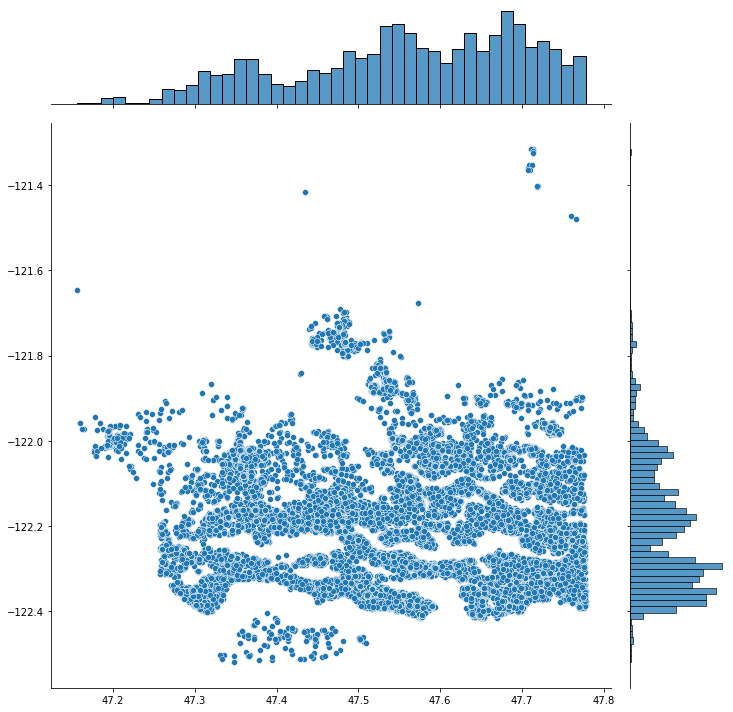

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [14]:
# to find the common location of houses - we study latitude and longitude
plt.figure(figsize=(10,10))
sns.jointplot(x=df.lat.values, y=df.long.values,size=10)
# plt.plot(df.lat.values, df.long.values)
plt.xlabel('Latitude',fontsize = 15)
plt.ylabel('Longitude',fontsize = 15)
plt.show()
sns.despine
# from the plot we infer most houses lie b/w lat (47.7-47.8) and long (-122.2--122.4)

Text(0.5, 1.0, 'Price vs Square ft')

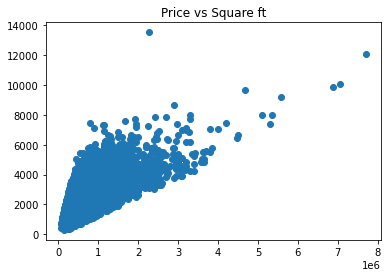

In [17]:
# To infer how sqft affect prices
plt.scatter(df.price,df.sqft_living)
plt.title("Price vs Square ft")
# higher the sqft, higher prices
# but some anomaly too - house with highest sqft sold for less price - means other factors too

Text(0.5, 1.0, 'Price vs Laocation of area')

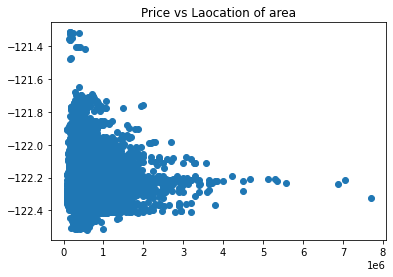

In [18]:
# To infer how location of the area affect prices
plt.scatter(df.price,df.long)
plt.title("Price vs Laocation of area")
# Most houses found in range(-122.2, -122.4)

Text(0.5, 1.0, 'Bedroom vs Price')

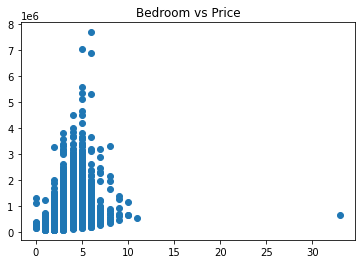

In [21]:
plt.scatter(df.bedrooms,df.price)
plt.title("Bedroom vs Price")

Text(0.5, 1.0, 'Total Area vs Price')

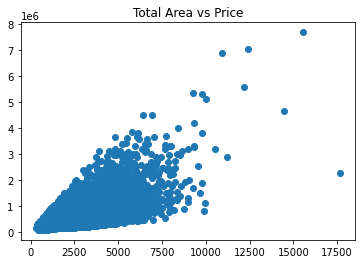

In [25]:
plt.scatter((df['sqft_living']+df['sqft_basement']),df['price'])
plt.title("Total Area vs Price")

Text(0.5, 1.0, 'Waterfront vs Price')

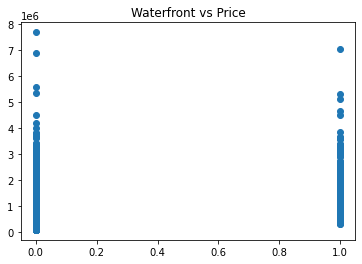

In [24]:
plt.scatter(df.waterfront,df.price)
plt.title("Waterfront vs Price")

Text(0.5, 1.0, 'Floors vs Price')

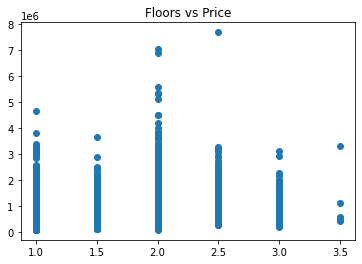

In [27]:
plt.scatter(df.floors,df.price)
plt.title("Floors vs Price")

Text(0.5, 1.0, 'Condition vs Price')

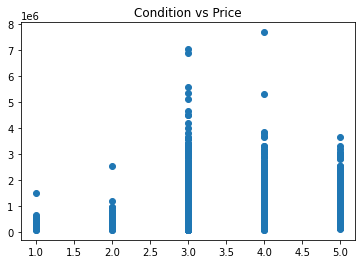

In [28]:
plt.scatter(df.condition,df.price)
plt.title("Condition vs Price")

Text(0.5, 1.0, 'Zipcode vs Price')

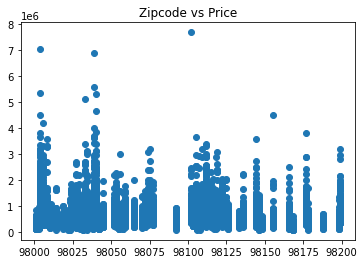

In [29]:
plt.scatter(df.zipcode,df.price)
plt.title("Zipcode vs Price")

### Linear regression model

In [30]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [31]:
labels = df['price']
conv_dates = [1 if values==2014 else 0 for values in df.date]
df['date'] = conv_dates
train1 = df.drop(['id','price'],axis=1)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(train1, labels, random_state=2)

In [35]:
reg.fit(X_train,y_train)

LinearRegression()

In [36]:
reg.score(X_test, y_test)

0.7055880872354622

The accuracy is 70%

### Increasing the accuracy

To increase the accuracy, here I used Gradient Descent Boosting

In [37]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators=400, max_depth=5, min_samples_split=2,learning_rate=0.1,loss='ls')

In [38]:
clf.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [39]:
clf.score(X_test,y_test)

0.9087485053368741

#### Accuracy increased to 90%